# CTM MILP Formulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
import time

from ctmmodels.const import *
from ctmmodels.nophasing import Constraint5Model
from ctmmodels.altphasing import Constraint5AltPhasingModel

## Constants

In [2]:
FLOW_UNDERSAT       = 450 # veh / hr / lane
FLOW_SAT            = 600 
FLOW_OVERSAT        = 900

Timesteps : Running Time
10        : 0.32
20        : 7.18

## Using the Module

In [31]:
model1 = Constraint5AltPhasingModel(sat_flow_rate=600, demand=450)
model1.generate()

model2 = Constraint5Model(sat_flow_rate=600, demand=450)
model2.generate()

In [32]:
print("Old:")
model2.solve(log_output=True)

Old:
Solving...
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 1860.000000 after 0.00 sec. (0.16 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 1056 rows and 292 columns.
MIP Presolve modified 636 coefficients.
Aggregator did 292 substitutions.
Reduced MIP has 2912 rows, 1816 columns, and 11468 nonzeros.
Reduced MIP has 360 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (10.42 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Tried aggregator 1 time.
Reduced MIP has 2912 rows, 1816 columns, and 11468 nonzeros.
Reduced MIP has 360 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (8.61 ticks)
Probing time = 0.00 sec. (0.20 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.06 sec. (53.96 ticks)

        Nodes                                         Cuts/
   Node  Left     Objec

27.872368097305298

In [29]:
print("New:")
model1.solve(log_output=True)

Old:
Solving...
Done!
Time elapsed: 25.3073120117
New:
Solving...
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 1860.000000 after 0.00 sec. (0.14 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 1084 rows and 652 columns.
MIP Presolve modified 632 coefficients.
Aggregator did 292 substitutions.
Reduced MIP has 2936 rows, 1696 columns, and 10644 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (9.83 ticks)
Probing time = 0.00 sec. (0.20 ticks)
Tried aggregator 1 time.
Reduced MIP has 2936 rows, 1696 columns, and 10644 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (6.79 ticks)
Probing time = 0.00 sec. (0.20 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.08 sec. (56.76 ticks)

        Nodes                     

  35975 25548       41.9180   126       52.5333       24.8967  3359205   52.61%
  36373 26082       38.2204   134       52.5333       24.9973  3426911   52.42%
  36775 26494       49.4149   113       52.5333       24.9973  3478851   52.42%
  37147 26696       50.0262    85       52.5333       24.9973  3504093   52.42%
  37626 27037       31.6415   168       52.5333       24.9973  3546712   52.42%
  38354 27191       46.7428    87       52.5333       25.1503  3565766   52.13%
  39106 27926        cutoff             52.5333       25.2081  3662756   52.02%
  39864 28471       51.8826   103       52.5333       25.2877  3730832   51.86%
  40606 29450       43.4675   136       52.5333       25.3782  3858246   51.69%
  41401 29725       50.8720    74       52.5333       25.4362  3895030   51.58%
Elapsed time = 92.53 sec. (64291.47 ticks, tree = 30.41 MB, solutions = 21)
  42187 30177        cutoff             52.5333       25.4852  3949479   51.49%
  42959 31126       45.0910   112       52.5

320.14147305488586

Parameters: Timestep..Timerange, G_min..G_max, Inflow Demand

---

Parameters: 3..20, 2..5, 600

Old: 0.028

New: 3.745

---

Parameters: 1..20, 2..5, 600

Old: 12.471

New: 11.575

---

Parameters: 1..20, 2..5, 900

Old: 7.483

New: 3.829

## Showing the Cell Capacities

In [20]:
model = model1

In [21]:
df_x, df_y, df_g = model.return_solution()

In [22]:
df_x_source = df_x[df_x.cell == (CELL_SOURCE,0,1)].sort_values(by='timestep')
df_x_normal0 = df_x[df_x.cell == (CELL_NORMAL,0,1)].sort_values(by='timestep')
df_x_normal1 = df_x[df_x.cell == (CELL_NORMAL,1,1)].sort_values(by='timestep')
df_x_normal2 = df_x[df_x.cell == (CELL_NORMAL,2,1)].sort_values(by='timestep')
df_x_left = df_x[df_x.cell == (CELL_MOVEMENT,THROUGH_TURN,1)].sort_values(by='timestep')
df_x_sink = df_x[df_x.cell == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].sort_values(by='timestep')

df_x_approach = df_x_source.append(df_x_normal1).append(df_x_normal2).append(df_x_normal0).append(df_x_left).append(df_x_sink)
df_x_approach = df_x_approach.pivot(index='timestep', columns='cell', values='volume')
df_x_approach

cell,"(0, 0, 1)","(1, 0, 3)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,,
0,1.0,0.000000,0.000000,0.0,0.0,0.0
1,1.0,0.000000,0.000000,1.0,0.0,0.0
2,1.0,0.000000,0.000000,1.0,1.0,0.0
3,1.0,0.000000,0.000000,1.0,1.0,1.0
4,1.0,0.000000,0.500000,1.0,1.0,1.0
5,1.0,1.000000,0.500000,1.0,1.0,1.0
6,1.0,1.000000,0.500000,1.0,1.0,1.0
7,1.0,1.000000,0.500000,1.0,1.0,1.0
8,1.0,1.000000,0.500000,1.0,1.0,1.0


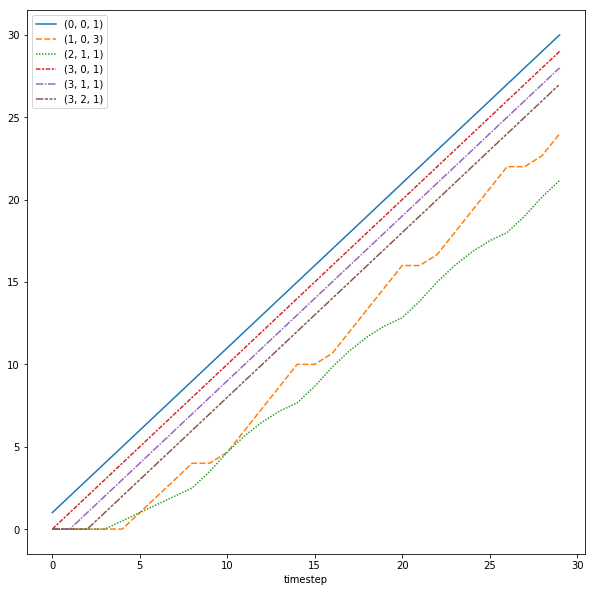

In [23]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_x_approach.cumsum())

This linear, cascading cumulative sum of consecutive cells (except for the through cell) means that the turning ratio is working fine.

In [24]:
df_y_source = df_y[df_y.cell_from == (CELL_SOURCE,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal0 = df_y[df_y.cell_from == (CELL_NORMAL,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal1 = df_y[df_y.cell_from == (CELL_NORMAL,1,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_left = df_y[df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_sink = df_y[df_y.cell_from == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')

df_y_approach = df_y_source.append(df_y_normal1).append(df_y_normal2).append(df_y_normal0).append(df_y_left).append(df_y_sink)
df_y_approach.reset_index(inplace=True)
df_y_approach = df_y_approach.pivot(index='timestep', columns='cell_from', values='flow')
df_y_approach

cell_from,"(0, 0, 1)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,
0,1.0,0.000000,0.0,0.0,0.0
1,1.0,0.000000,1.0,0.0,0.0
2,1.0,0.000000,1.0,1.0,0.0
3,1.0,0.000000,1.0,1.0,1.0
4,1.0,0.500000,1.0,1.0,1.0
5,1.0,0.500000,1.0,1.0,1.0
6,1.0,0.500000,1.0,1.0,1.0
7,1.0,0.500000,1.0,1.0,1.0
8,1.0,0.000000,1.0,1.0,1.0


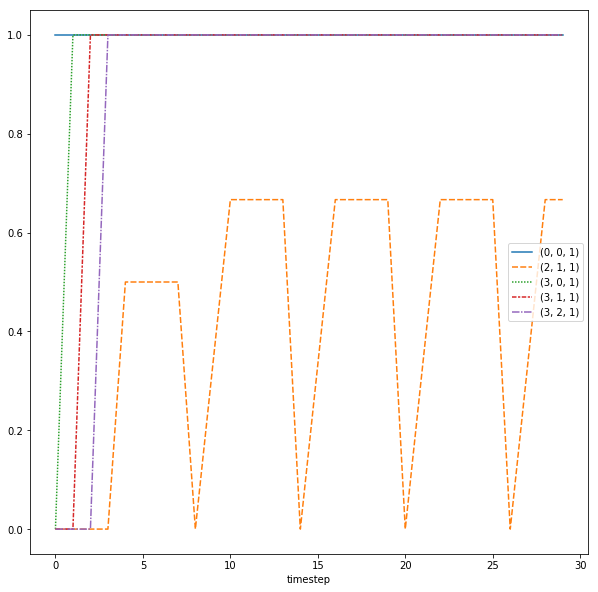

In [25]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_y_approach)

### Comparing the Green Signal and the Flow

In [26]:
df_g_specific = df_g[df_g.cell == (1,0,1)].sort_values(by='timestep')
df_g_specific.cell = df_g_specific.cell.apply(lambda x: (CELL_MOVEMENT,THROUGH_TURN,1))
df_y_specific = df_y[(df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)) & (df_y.cell_to == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0])].sort_values(by='timestep')
df_y_specific = df_y_specific.groupby(['timestep', 'cell_from']).agg({'flow': 'sum'}).reset_index()

df_g_y = pd.merge(df_g_specific, df_y_specific, left_on=['timestep', 'cell'], right_on=['timestep', 'cell_from'])[
    ['timestep', 'is_green', 'flow']
]

df_g_y.set_index('timestep', inplace=True)

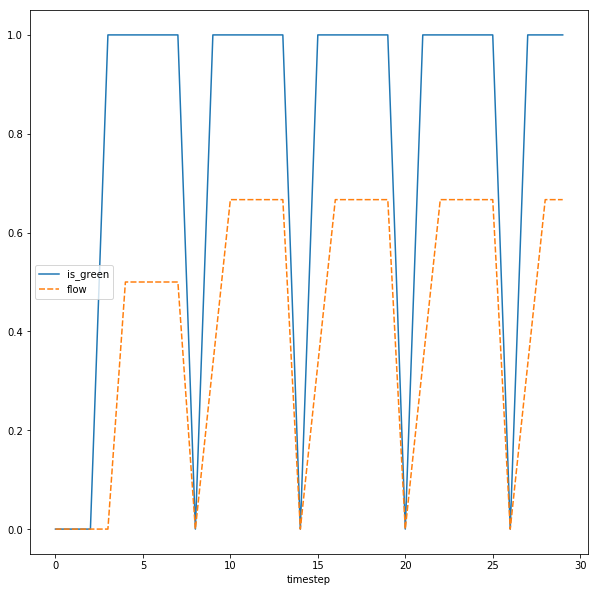

In [27]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_g_y)